In [1]:
import pandas as pd  #	To read, clean, manipulate, and analyze the data easily.
import numpy as np   #	To perform numerical calculations — percentages, growth rates, etc
import matplotlib.pyplot as plt  #	To create plots and graphs like line plots, bar charts, etc
import seaborn as sns  #	To create beautiful and professional-looking graphs easily 


In [4]:
# Load Year 1 Data
df_year1 = pd.read_excel('C:/Users/hariharan/Downloads/Marketing_Data_Year_1.xlsx')

# Load Year 2 Data
df_year2 = pd.read_excel('C:/Users/hariharan/Downloads/Marketing_Data_Year_2.xlsx')

In [5]:
# Check Year 1 data
df_year1.head()

# Check Year 2 data
df_year2.head()

,Business_Id,Total_Actions,Website_Clicks,Phone_Clicks,Direction_Requested,Total_Views,Map_Views,Search_Views,Action_From_Views,Chats,Bvn_Calls,Bookings,Source,Area_Name,City,State,Gmb_Store_Code
0,11421898,87,3,34,50,1022,190,832,8.51%,0,0,0,Google,\tBasavanagudi,Bengaluru,Karnataka,F844
1,11421898,3,0,1,2,124,0,124,NaN,0,0,0,Microsite,\tBasavanagudi,Bengaluru,Karnataka,F844
2,11421899,70,3,12,55,401,62,339,17.46%,0,0,0,Google,\tKothamangalam,Kothamangalam,Kerala,F1435
3,11421899,7,0,7,0,17,0,17,NaN,0,0,0,Microsite,\tKothamangalam,Kothamangalam,Kerala,F1435
4,11421899,0,0,0,0,1,0,1,NaN,0,0,0,Sulekha,\tKothamangalam,Kothamangalam,Kerala,F1435


In [6]:
# Clean Year 1
df_year1.columns = df_year1.columns.str.strip()
df_year1.dropna(how='all', inplace=True)

# Clean Year 2
df_year2.columns = df_year2.columns.str.strip()
df_year2.dropna(how='all', inplace=True)

In [7]:
#Adding year column to each dataset because it is important for comparison

df_year1['Year'] = 'Year 1'
df_year2['Year'] = 'Year 2'

In [8]:
#Combine Both Datasets into One

df = pd.concat([df_year1, df_year2], ignore_index=True)

In [10]:

# Sum up total actions for each year
total_actions_year1 = df[df['Year'] == 'Year 1']['Total_Actions'].sum()
total_actions_year2 = df[df['Year'] == 'Year 2']['Total_Actions'].sum()

print(f"Total Marketing Actions in Year 1: {total_actions_year1}")
print(f"Total Marketing Actions in Year 2: {total_actions_year2}")

Total Marketing Actions in Year 1: 262045
Total Marketing Actions in Year 2: 262045


In [11]:
# Calculate Growth Percentage across States and Cities
# Pivot the data to have Year 1 and Year 2 side-by-side
pivot_city = df.pivot_table(index='City', columns='Year', values='Total_Actions')

# Calculate percentage growth
pivot_city['Growth %'] = ((pivot_city['Year 2'] - pivot_city['Year 1']) / pivot_city['Year 1']) * 100

# View
pivot_city.head()

Year,Year 1,Year 2,Growth %
City,,,
Abohar,39.500000,39.500000,0.0
Adilabad,28.111111,28.111111,0.0
Adoni,22.000000,22.000000,0.0
Agra,41.615385,41.615385,0.0
Ahmedabad,39.333333,39.333333,0.0


In [13]:
#This is for States

pivot_state = df.pivot_table(index='State', columns='Year', values='Total_Actions')
pivot_state['Growth %'] = ((pivot_state['Year 2'] - pivot_state['Year 1']) / pivot_state['Year 1']) * 100
pivot_state.head()

Year,Year 1,Year 2,Growth %
State,,,
Andaman and Nicobar Islands,26.875000,26.875000,0.0
Andhra Pradesh,31.808786,31.808786,0.0
Assam,37.000000,37.000000,0.0
Bihar,23.666667,23.666667,0.0
Chandigarh,49.500000,49.500000,0.0


In [14]:
# City-wise Analysis and Yearly Comparison

city_analysis = df.groupby(['City', 'Year']).mean(numeric_only=True)
city_analysis.head()

Business_Id  Total_Actions  Website_Clicks  Phone_Clicks  \
City     Year                                                                
Abohar   Year 1  1.142246e+07      39.500000        0.500000     18.000000   
         Year 2  1.142246e+07      39.500000        0.500000     18.000000   
Adilabad Year 1  1.142322e+07      28.111111        0.055556      4.166667   
         Year 2  1.142322e+07      28.111111        0.055556      4.166667   
Adoni    Year 1  1.142243e+07      22.000000        0.000000      5.000000   

                 Direction_Requested  Total_Views  Map_Views  Search_Views  \
City     Year                                                                
Abohar   Year 1            21.000000   191.500000  30.500000    161.000000   
         Year 2            21.000000   191.500000  30.500000    161.000000   
Adilabad Year 1            23.888889   111.833333  14.777778     97.055556   
         Year 2            23.888889   111.833333  14.777778     97.055556   
Adoni    Year 1            17.000000   202.000000  15.500000    186.500000   

                    Chats  Bvn_Calls  Bookings  
City     Year                                   
Abohar   Year 1  0.000000        0.0  0.000000  
         Year 2  0.000000        0.0  0.000000  
Adilabad Year 1  0.055556        0.0  0.055556  
         Year 2  0.055556        0.0  0.055556  
Adoni    Year 1  0.000000        0.0  0.000000

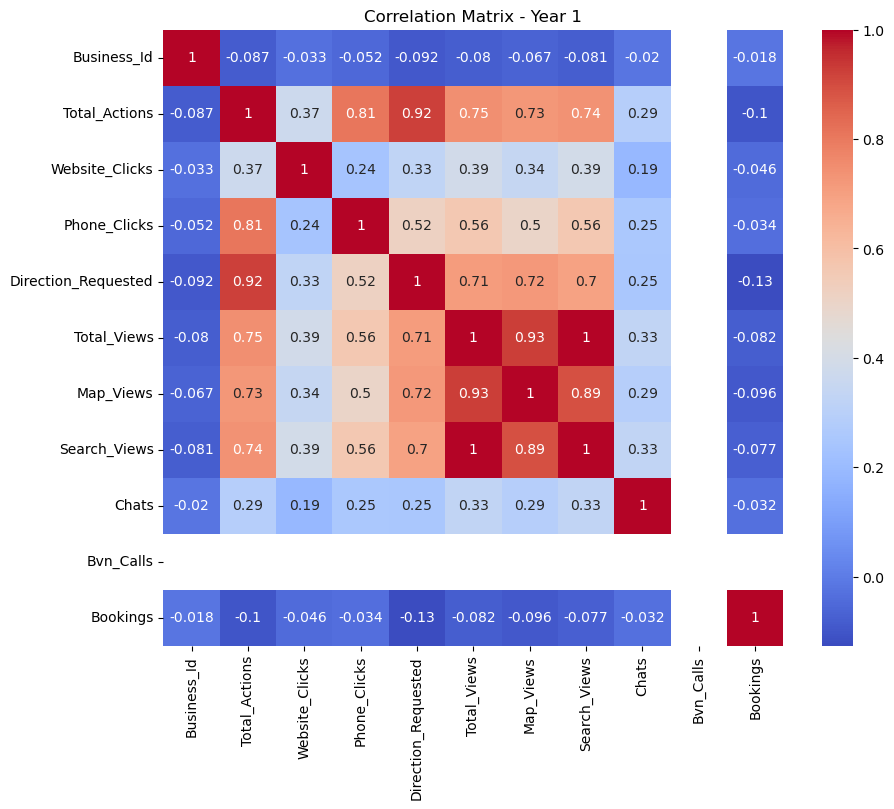

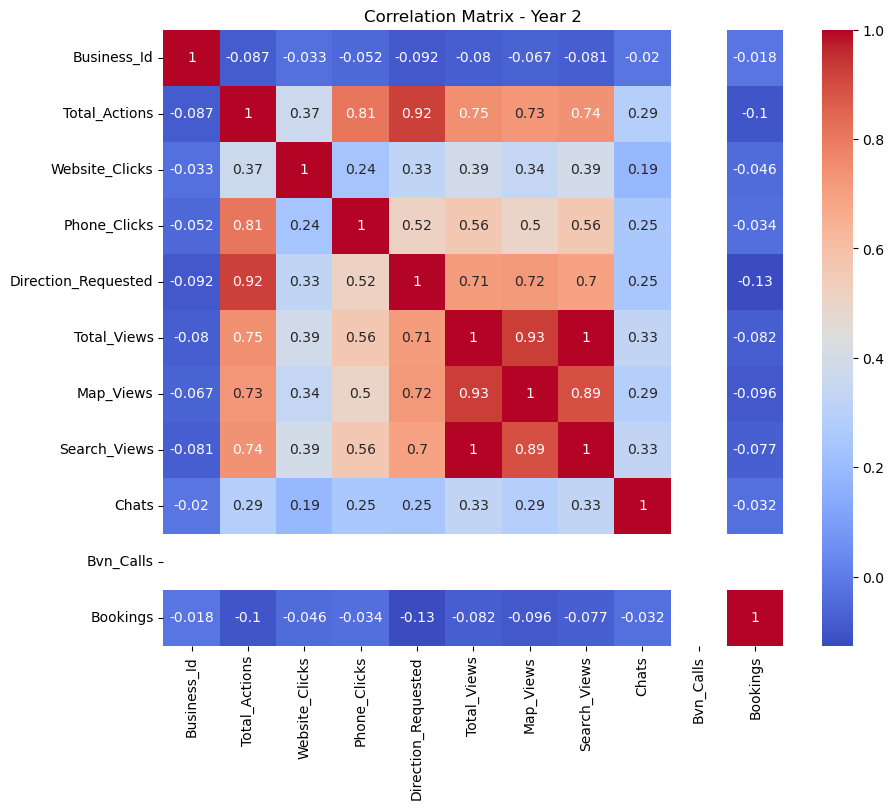

In [15]:
# Correlation analysis

# Correlation for Year 1
corr_year1 = df_year1.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_year1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Year 1')
plt.show()

# Correlation for Year 2
corr_year2 = df_year2.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_year2, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Year 2')
plt.show()

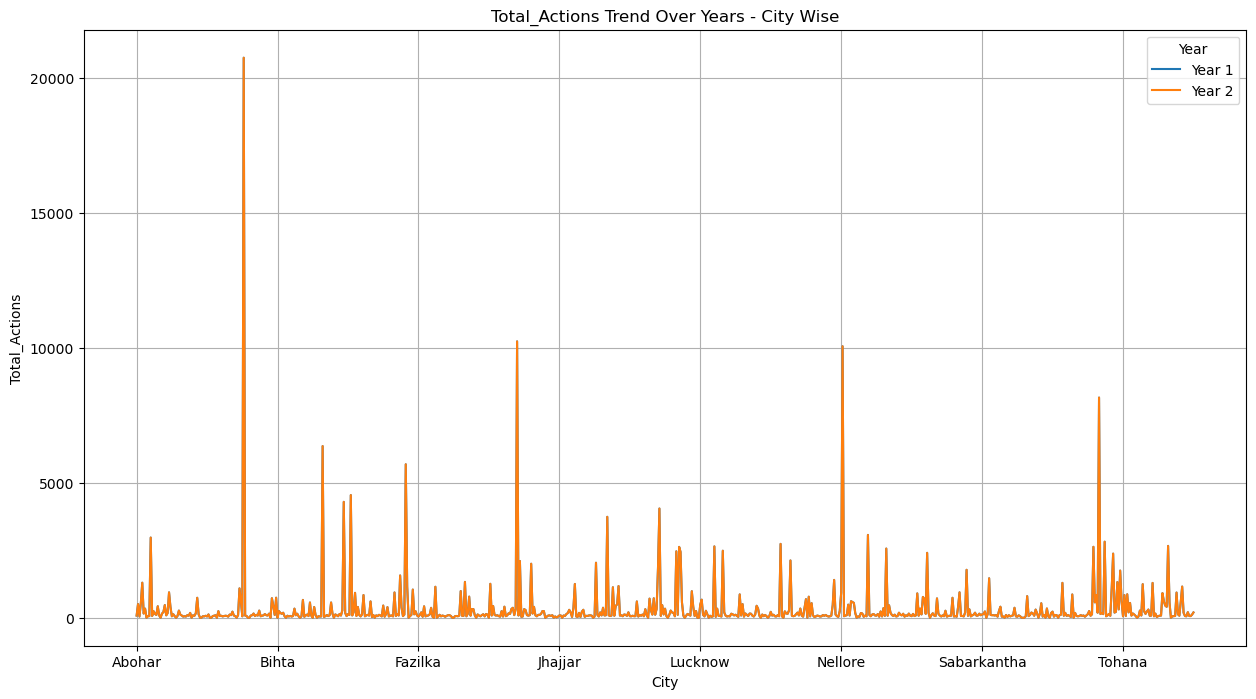

In [17]:
# VISUALIZATION

#LINE PLOTS

# Example for Total Actions per city
city_trend = df.groupby(['City', 'Year'])['Total_Actions'].sum().unstack()

city_trend.plot(kind='line', figsize=(15, 8))
plt.title('Total_Actions Trend Over Years - City Wise')
plt.xlabel('City')
plt.ylabel('Total_Actions')
plt.grid()
plt.show()

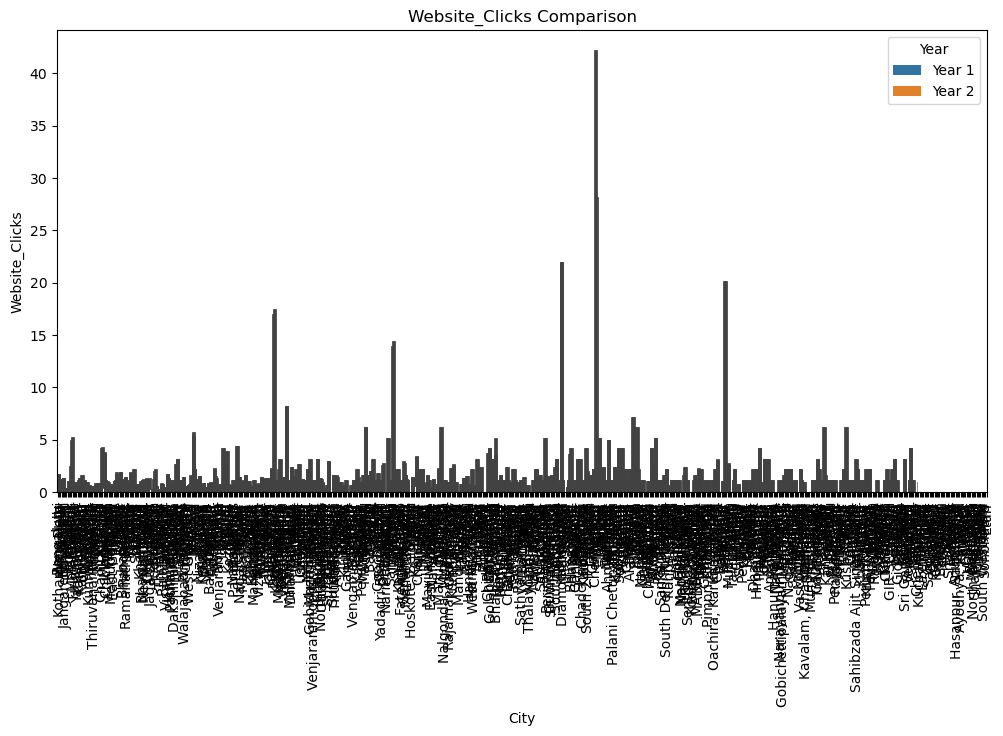

In [22]:
# Website Clicks comparison
plt.figure(figsize=(12,6))
sns.barplot(x='City', y='Website_Clicks', hue='Year', data=df)
plt.xticks(rotation=90)
plt.title('Website_Clicks Comparison')
plt.show()

# Similarly for Phone Clicks, Direction Requested

In [24]:
#Providing insights on how the market performance has evolved over the last few years.

# Sum of total actions for each year
total_actions_year1 = df[df['Year'] == 'Year 1']['Total_Actions'].sum()
total_actions_year2 = df[df['Year'] == 'Year 2']['Total_Actions'].sum()

# Calculate growth percentage
growth_percentage = (total_actions_year2 - total_actions_year1) / total_actions_year1 * 100
print(f"Total_Actions in Year 1: {total_actions_year1}")
print(f"Total_Actions in Year 2: {total_actions_year2}")
print(f"Growth Percentage: {growth_percentage}%")

Total_Actions in Year 1: 262045
Total_Actions in Year 2: 262045
Growth Percentage: 0.0%


In [27]:
#. Identifying  cities with consistent growth, decline, or fluctuations in metrics.
# Group data by city and calculate the average metrics for both years
city_yearly_avg = df.groupby(['City', 'Year']).agg({
    'Total_Actions': 'sum',
    'Website_Clicks': 'sum',
    'Phone_Clicks': 'sum',
    'Direction_Requested': 'sum'
}).reset_index()

# Compare year-over-year data for each city
city_growth = city_yearly_avg.pivot(index='City', columns='Year', values='Total_Actions')
city_growth['Growth'] = (city_growth['Year 2'] - city_growth['Year 1']) / city_growth['Year 1'] * 100
print(city_growth)

Year          Year 1  Year 2  Growth
City                                
Abohar            79      79     0.0
Adilabad         506     506     0.0
Adoni             44      44     0.0
Agra             541     541     0.0
Ahmedabad       1298    1298     0.0
...              ...     ...     ...
Yamuna Nagar     206     206     0.0
Yaragatti         64      64     0.0
Yavatmal          61      61     0.0
Zirakpur         115     115     0.0
jalandhar        195     195     0.0

[751 rows x 3 columns]


In [29]:
# Performing hypothesis tests to compare specific metrics between the two years 
from scipy import stats

# Filter data for Year 1 and Year 2
year1_data = df[df['Year'] == 'Year 1']['Total_Actions']
year2_data = df[df['Year'] == 'Year 2']['Total_Actions']

# Perform a t-test
t_stat, p_value = stats.ttest_ind(year1_data, year2_data)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("The difference between Year 1 and Year 2 is statistically significant.")
else:
    print("The difference between Year 1 and Year 2 is not statistically significant.")

T-statistic: 0.0, P-value: 1.0
The difference between Year 1 and Year 2 is not statistically significant.
